# **Importando librerias necesarias**

In [1]:
!pip install tensorflow==2.16.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
ten

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

# **Cargando Datos del Dataset y Preprocesando el mismo (no es lo mismo que preprocesar el texto ojo)**

In [3]:
df = pd.read_csv('/kaggle/input/emotions/text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
print(f'Dimension de los datos : {df.shape}') #(Filas,Columnas)

Dimension de los datos : (416809, 3)


In [5]:
df.duplicated().sum() #Comprobando las filas duplicadas

0

In [6]:
df.isnull().sum() #Comprobando las vacias

Unnamed: 0    0
text          0
label         0
dtype: int64

In [7]:
#Renombrando columnas para mayor legibilidad (inplance hace que no te devuelva un dataframe y guarde todo en el mismo dataframe)
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)

In [8]:
#Eliminando la columna Unnamed , aparece en los csv donde hay un indice sin nombre
#axis 1 elimina columna , axis 0 una fila
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
#Visualizando cambios 
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [10]:
#Renombrando las columnas a las emociones (ingles es el idioma del dataset)
#0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'
df['Label'] = df['Label'].replace(0,'Sadness')
df['Label'] = df['Label'].replace(1,'Joy')
df['Label'] = df['Label'].replace(2,'Love')
df['Label'] = df['Label'].replace(3,'Anger')
df['Label'] = df['Label'].replace(4,'Fear')
df['Label'] = df['Label'].replace(5,'Surprise')

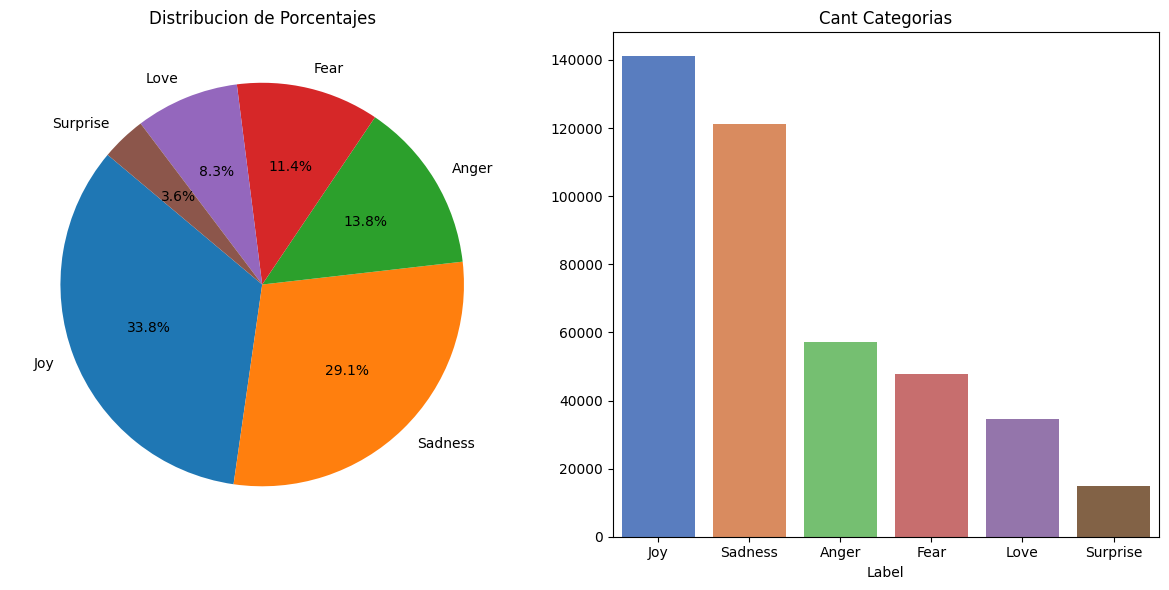

In [11]:
#Visualizando graficos para entender mejor el dataset

# Sumando la cant de cada categoria
count = df['Label'].value_counts()

# Creando figura con dos graficos 
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Grafico de Pastel
palette = sns.color_palette("muted")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribucion de Porcentajes')

# Grafico de Barras
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="muted")
axs[1].set_title('Cant Categorias')

plt.tight_layout()

plt.show()

# Analizando los datos del DataSet

In [12]:
# Separando cada emocion en un dataframe 

df_sadness = df[df['Label']=='Sadness']
df_joy = df[df['Label']=='Joy']
df_love = df[df['Label']=='Love']
df_anger = df[df['Label']=='Anger']
df_fear = df[df['Label']=='Fear']
df_surprise = df[df['Label']=='Surprise']

**Word Cloud representa visualmente las palabras que tiene cada conjunto , las que mas se repiten se ven mas grandes**...............
**Consume recursos y ralentiza un poco sin aceleracion por GPU**

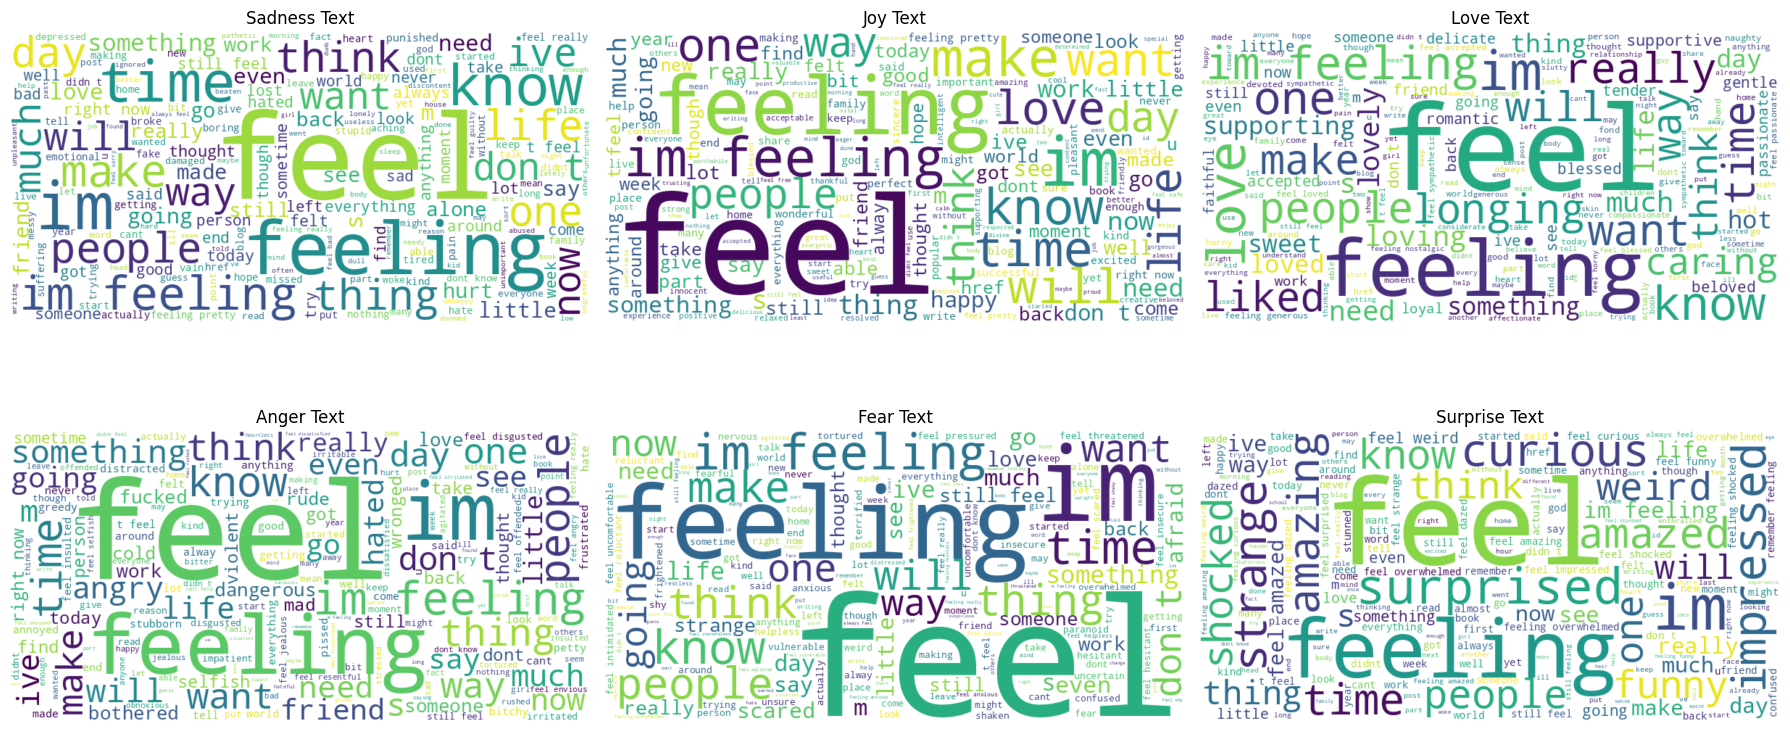

In [13]:
#Combina el texto de cada subconjunto del df en una sola cadena para cada emoción.
combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

#Creando las nubes de palabras de cada emocion
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
#Convirtiendo las etiquetas de Text a su valor original para el ML
df['Label'] = df['Label'].replace('Sadness',0)
df['Label'] = df['Label'].replace('Joy',1)
df['Label'] = df['Label'].replace('Love',2)
df['Label'] = df['Label'].replace('Anger',3)
df['Label'] = df['Label'].replace('Fear',4)
df['Label'] = df['Label'].replace('Surprise',5)

/tmp/ipykernel_18/2935977798.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace('Surprise',5)


# **Preprocesamiento de Texto**

**Orden del proceso**

**Paso 1: Eliminar URLs:** Utiliza una expresión regular para eliminar las URLs de los datos de texto.

**Paso 2: Eliminar caracteres especiales y puntuación:** Utiliza una expresión regular para eliminar cualquier carácter especial y signos de puntuación del texto.

**Paso 3: Eliminar espacios en blanco adicionales:** Utiliza una expresión regular para eliminar espacios en blanco adicionales y reemplazarlos por un solo espacio.

**Paso 4: Eliminar valores numéricos:** Utiliza una expresión regular para eliminar cualquier valor numérico del texto.

**Paso 5: Convertir a minúsculas:** Convierte todo el texto a minúsculas para garantizar la consistencia.

**Paso 6: Eliminar palabras vacías:** Elimina las palabras vacías comunes en inglés, como "el," "es," "y," etc., utilizando la lista de palabras vacías de NLTK.

**Paso 7: Eliminar caracteres no alfanuméricos:** Utiliza una expresión regular para eliminar cualquier carácter no alfanumérico del texto

In [15]:
# Importando librerias basicas, nltk --> natural language tool kit
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Descargando Recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True